In [1]:
import pandas as pd 
import numpy as np 

In [2]:
target= pd.read_csv('1_target_ts.csv')
related= pd.read_csv('2_related_ts.csv',header=None)

In [3]:
print(target.columns)
print(related.columns)

Index(['item', 'org', 'date', 'quantity'], dtype='object')
Index([0, 1, 2, 3], dtype='int64')


In [4]:
print(related.head(10))
print(related.columns)

         0        1           2         3
0  3959294  1617388  2014-03-01  0.530465
1  3959294  1617388  2014-04-01  0.531425
2  3959294  1617388  2014-05-01  0.528394
3  3959294  1617388  2014-06-01  0.532754
4  3959294  1617388  2014-07-01  0.538318
5  3959294  1617388  2014-08-01  0.522294
6  3959294  1617388  2014-09-01  0.537021
7  3959294  1617388  2014-10-01  0.539876
8  3959294  1617388  2014-11-01  0.534087
9  3959294  1617388  2014-12-01  0.536411
Index([0, 1, 2, 3], dtype='int64')


In [5]:
related.columns=["item","org","date","value"]

In [6]:
Data= pd.merge(target,related, on=["item","org","date"],how="left")

In [7]:
Data.head(10)

,item,org,date,quantity,value
0,3959294,1617388,2014-03-01,6375.0,0.530465
1,3959294,1617388,2014-04-01,6797.0,0.531425
2,3959294,1617388,2014-05-01,7091.0,0.528394
3,3959294,1617388,2014-06-01,7499.0,0.532754
4,3959294,1617388,2014-07-01,7603.0,0.538318
5,3959294,1617388,2014-08-01,8061.0,0.522294
6,3959294,1617388,2014-09-01,8386.0,0.537021
7,3959294,1617388,2014-10-01,9733.0,0.539876
8,3959294,1617388,2014-11-01,9190.0,0.534087
9,3959294,1617388,2014-12-01,9416.0,0.536411


In [8]:
Data.describe()

,item,org,quantity,value
count,9.491000e+03,9.491000e+03,9491.000000,9491.000000
mean,7.634510e+07,2.132429e+07,7117.596671,1.513220
std,5.105328e+07,1.971765e+07,18632.107772,0.782812
min,3.959294e+06,1.617388e+06,0.000000,0.162500
25%,6.609938e+06,1.618308e+06,920.000000,1.116024
50%,1.032641e+08,4.002264e+07,2577.000000,1.285037
75%,1.168448e+08,4.202371e+07,5599.500000,1.631760
max,1.494406e+08,4.202371e+07,632612.000000,4.650000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

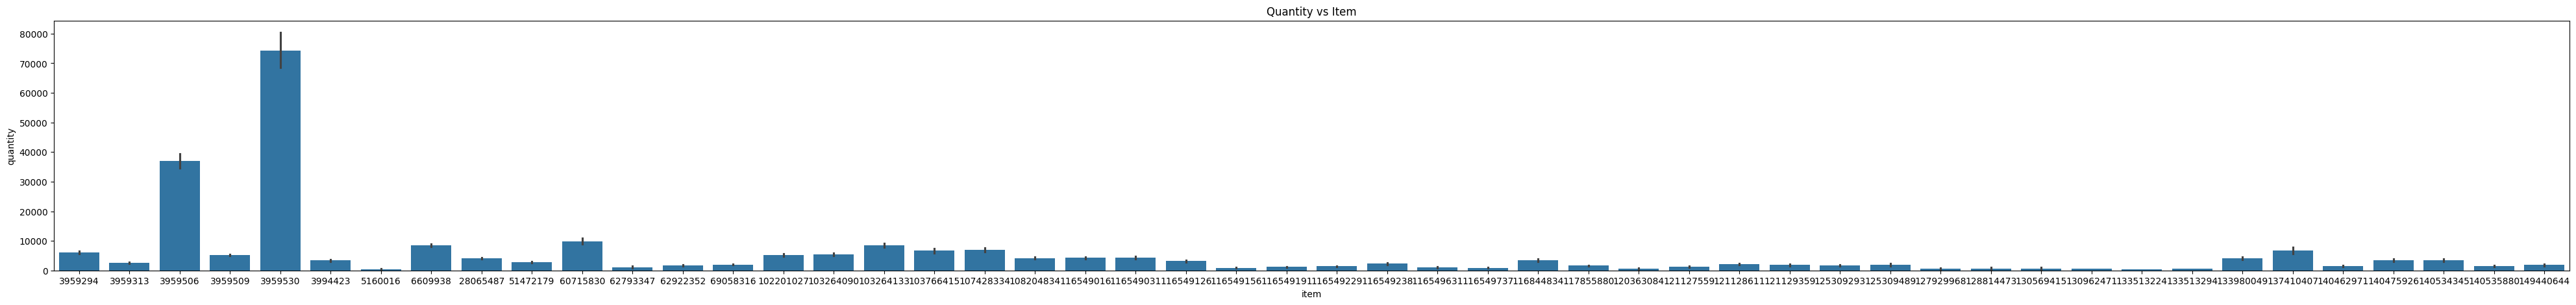

In [10]:
plt.figure(figsize=(50,5))
sns.barplot(x="item",y="quantity",data=target,estimator="mean")
plt.title("Quantity vs Item")
plt.show()

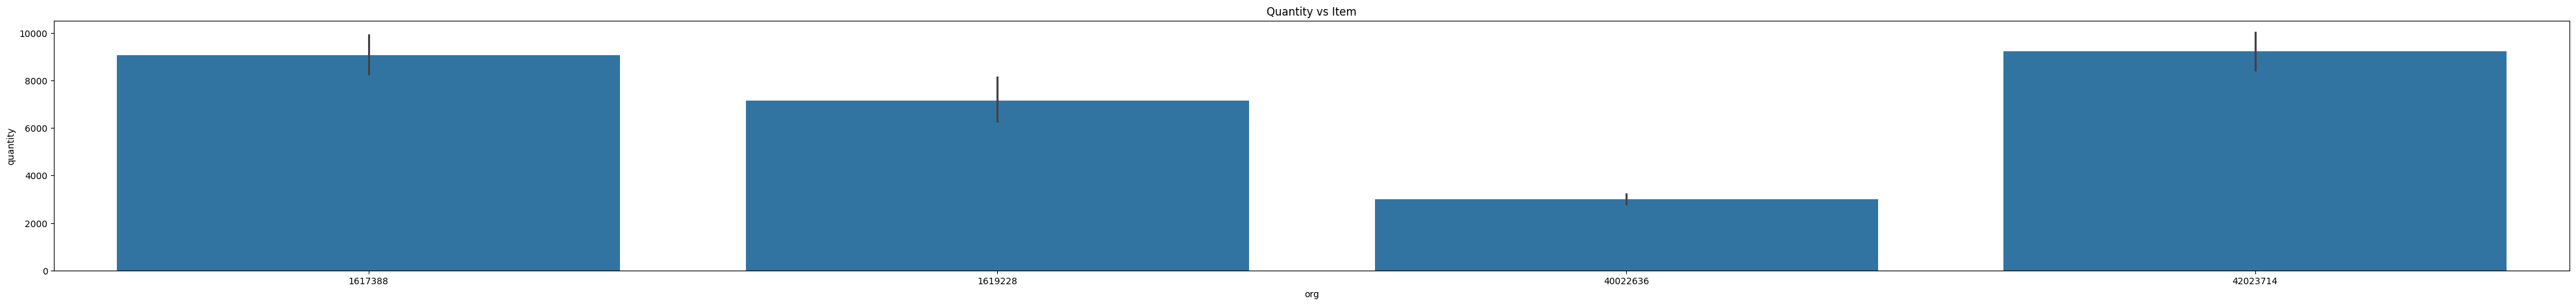

In [11]:
plt.figure(figsize=(50,5))
sns.barplot(x="org",y="quantity",data=target,estimator="mean")
plt.title("Quantity vs Item")
plt.show()

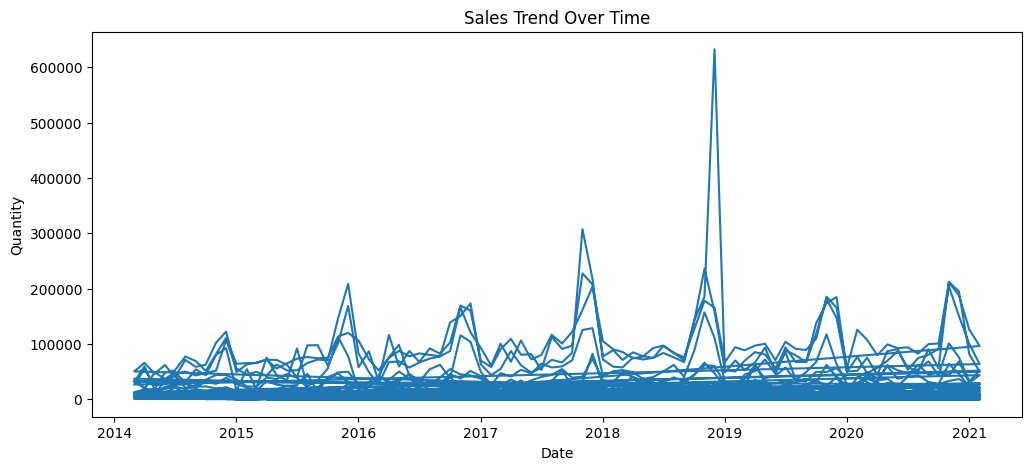

In [12]:
target["date"] = pd.to_datetime(target["date"])
plt.figure(figsize=(12,5))
plt.plot(target["date"], target["quantity"])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()

In [13]:
Data['date']=pd.to_datetime(Data['date'])

Data['year']=Data['date'].dt.year
Data['month']=Data['date'].dt.month

In [14]:
Data=Data.sort_values(by=["item","org","date"])

In [15]:
Data['lag']=Data.groupby(['item','org'])['quantity'].shift(1)

In [16]:
Data.head(10)

,item,org,date,quantity,value,year,month,lag
0,3959294,1617388,2014-03-01,6375.0,0.530465,2014,3,NaN
1,3959294,1617388,2014-04-01,6797.0,0.531425,2014,4,6375.0
2,3959294,1617388,2014-05-01,7091.0,0.528394,2014,5,6797.0
3,3959294,1617388,2014-06-01,7499.0,0.532754,2014,6,7091.0
4,3959294,1617388,2014-07-01,7603.0,0.538318,2014,7,7499.0
5,3959294,1617388,2014-08-01,8061.0,0.522294,2014,8,7603.0
6,3959294,1617388,2014-09-01,8386.0,0.537021,2014,9,8061.0
7,3959294,1617388,2014-10-01,9733.0,0.539876,2014,10,8386.0
8,3959294,1617388,2014-11-01,9190.0,0.534087,2014,11,9733.0
9,3959294,1617388,2014-12-01,9416.0,0.536411,2014,12,9190.0


In [17]:
Data.shape

(9491, 8)

In [20]:
categorical=['item','org']
Data_encoded=pd.get_dummies(Data, columns=categorical, drop_first=True)
print(Data_encoded.head())

        date  quantity     value  year  month     lag  item_3959313  \
0 2014-03-01    6375.0  0.530465  2014      3     NaN         False   
1 2014-04-01    6797.0  0.531425  2014      4  6375.0         False   
2 2014-05-01    7091.0  0.528394  2014      5  6797.0         False   
3 2014-06-01    7499.0  0.532754  2014      6  7091.0         False   
4 2014-07-01    7603.0  0.538318  2014      7  7499.0         False   

   item_3959506  item_3959509  item_3959530  ...  item_133980049  \
0         False         False         False  ...           False   
1         False         False         False  ...           False   
2         False         False         False  ...           False   
3         False         False         False  ...           False   
4         False         False         False  ...           False   

   item_137410407  item_140462971  item_140475926  item_140534345  \
0           False           False           False           False   
1           False         

In [21]:
Data_encoded.shape

(9491, 58)

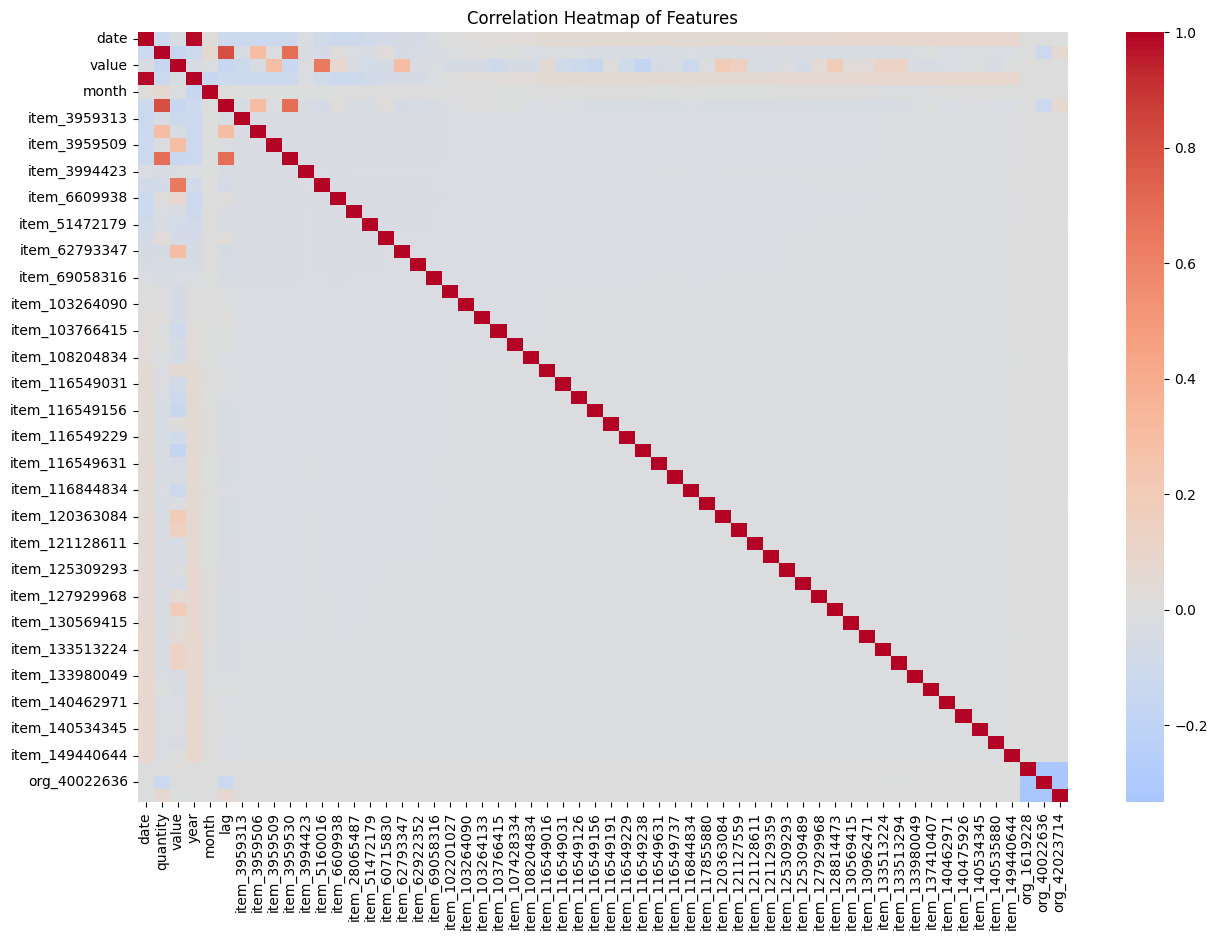

quantity          1.000000
lag               0.811424
item_3959530      0.689874
item_3959506      0.306529
org_42023714      0.065577
month             0.065468
item_60715830     0.026496
item_6609938      0.013812
item_103264133    0.010898
org_1619228       0.000764
Name: quantity, dtype: float64


In [22]:
corr = Data_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()
print(corr["quantity"].sort_values(ascending=False).head(10))

In [23]:
corr_with_target = Data_encoded.corr()["quantity"].sort_values(ascending=False)

print("Top positively correlated features:\n", corr_with_target.head(10))
print("\nTop negatively correlated features:\n", corr_with_target.tail(10))


Top positively correlated features:
 quantity          1.000000
lag               0.811424
item_3959530      0.689874
item_3959506      0.306529
org_42023714      0.065577
month             0.065468
item_60715830     0.026496
item_6609938      0.013812
item_103264133    0.010898
org_1619228       0.000764
Name: quantity, dtype: float64

Top negatively correlated features:
 item_120363084   -0.044107
item_69058316    -0.045729
item_3959313     -0.046604
item_62922352    -0.051276
item_62793347    -0.057165
item_5160016     -0.065140
date             -0.114141
year             -0.124036
org_40022636     -0.127105
value            -0.158564
Name: quantity, dtype: float64


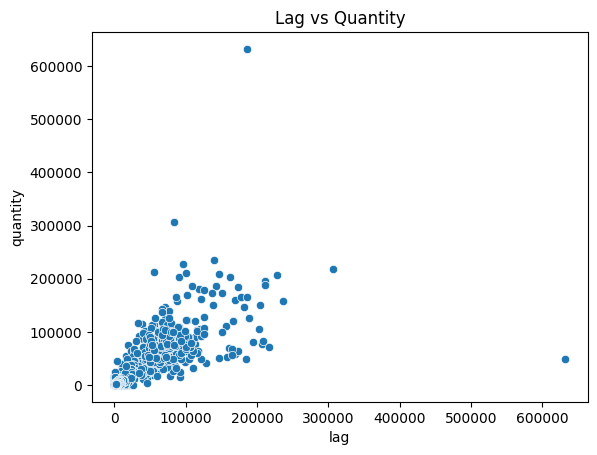

In [24]:
sns.scatterplot(x=Data_encoded["lag"], y=Data_encoded["quantity"])
plt.title("Lag vs Quantity")
plt.show()


month
1     4465140.0
2     4922489.0
3     4678705.0
4     5188247.0
5     5162236.0
6     4680244.0
7     5166703.0
8     5239908.0
9     5460303.0
10    6006796.0
11    7963755.0
12    8618584.0
Name: quantity, dtype: float64


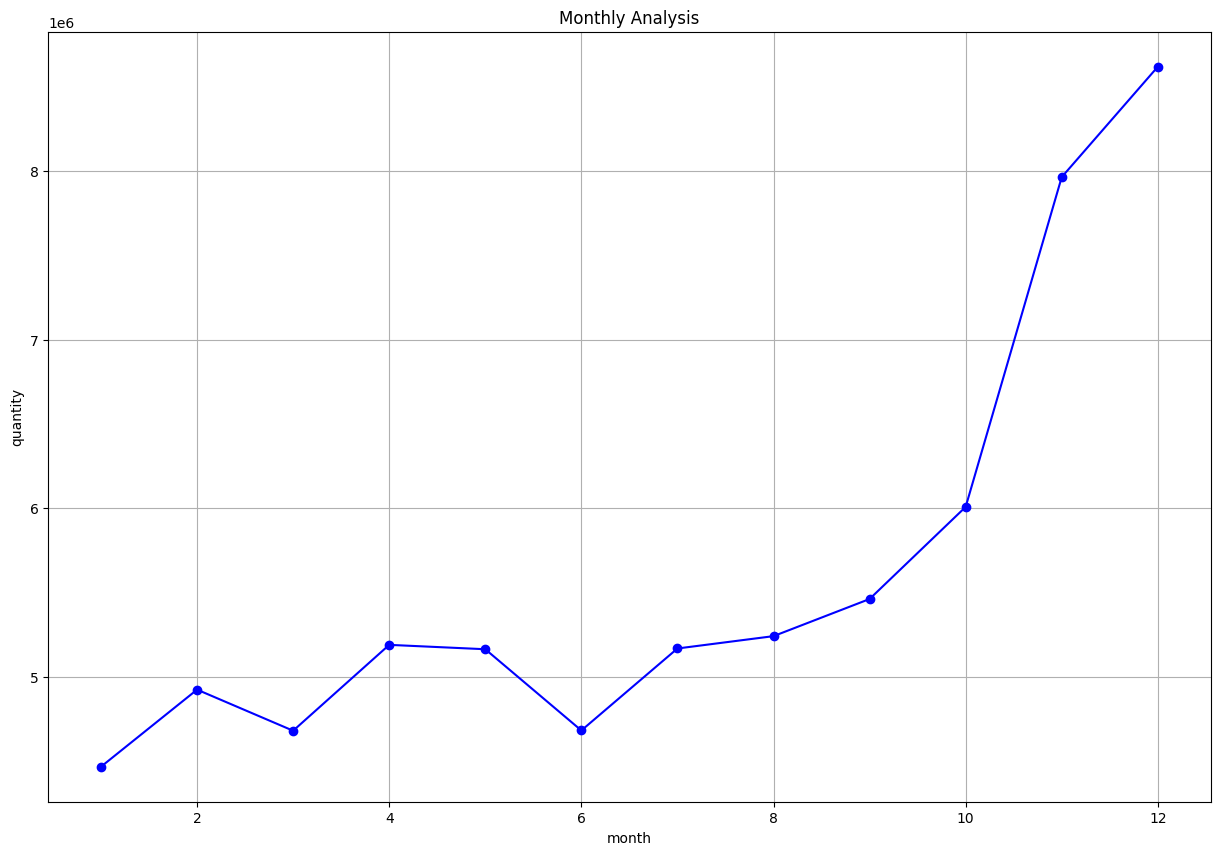

In [25]:
monthly_sales = Data.groupby("month")["quantity"].sum()  
print(monthly_sales)
plt.figure(figsize=(15,10))
plt.plot(monthly_sales.index,monthly_sales.values,marker='o',linestyle='-',color='b')
plt.title("Monthly Analysis")
plt.xlabel('month')
plt.ylabel('quantity')
plt.grid(True)
plt.show()



In [26]:
Data = Data.dropna()
train = Data[Data['year']<2020]
test = Data[Data['year']>=2020]
x_train= train[['lag','month','year']]
x_test= test[['lag','month','year']]
y_train=train[['quantity']]
y_test=test[['quantity']]

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
r2_lr= r2_score(y_test,y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)
print(r2)
print(rmse)
print(mae)

0.7409814074012635
7159.664315206432
2379.0864660402926


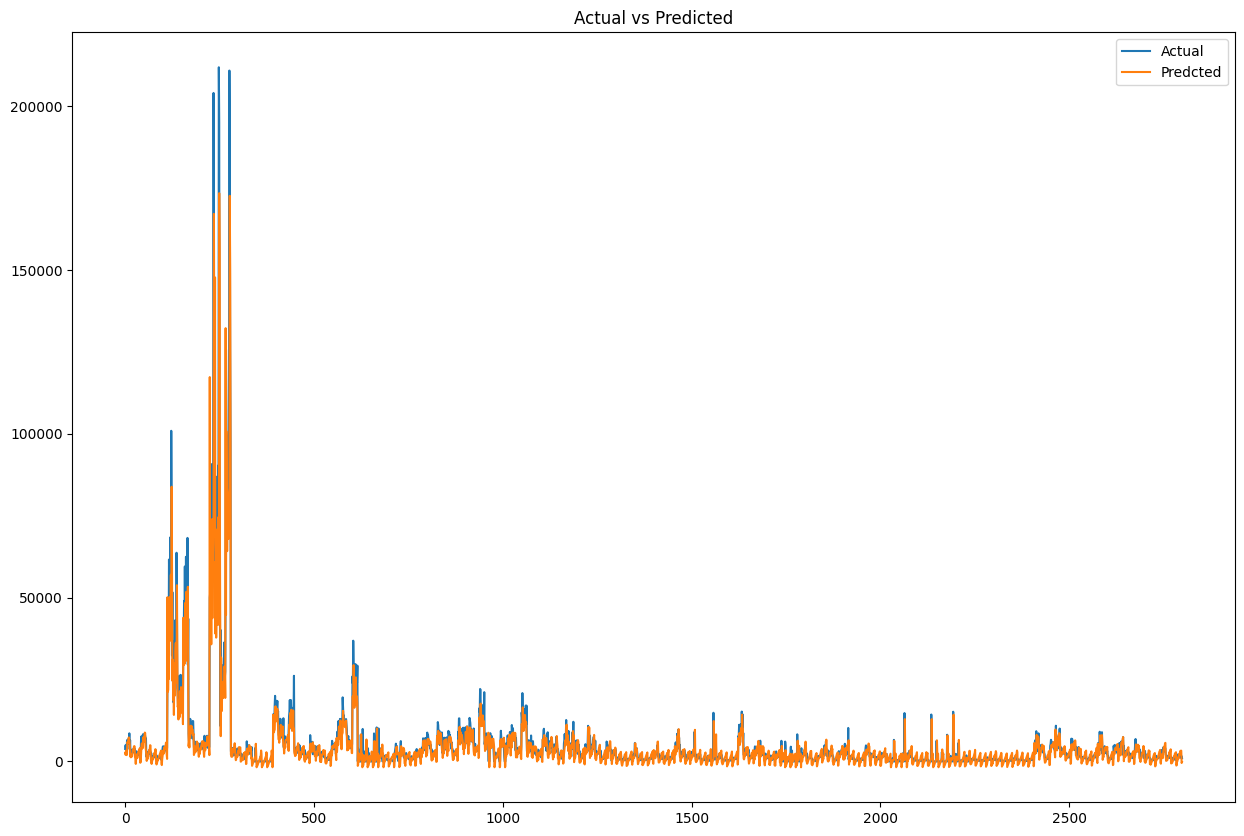

In [46]:
plt.figure(figsize=(15,10))
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predcted')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("GradientBoosting | R2: {:.4f} | RMSE: {:.4f} | MAE: {:.4f}".format(r2_gbr, rmse_gbr, mae_gbr))

GradientBoosting | R2: 0.6193 | RMSE: 8679.9633 | MAE: 1855.0082


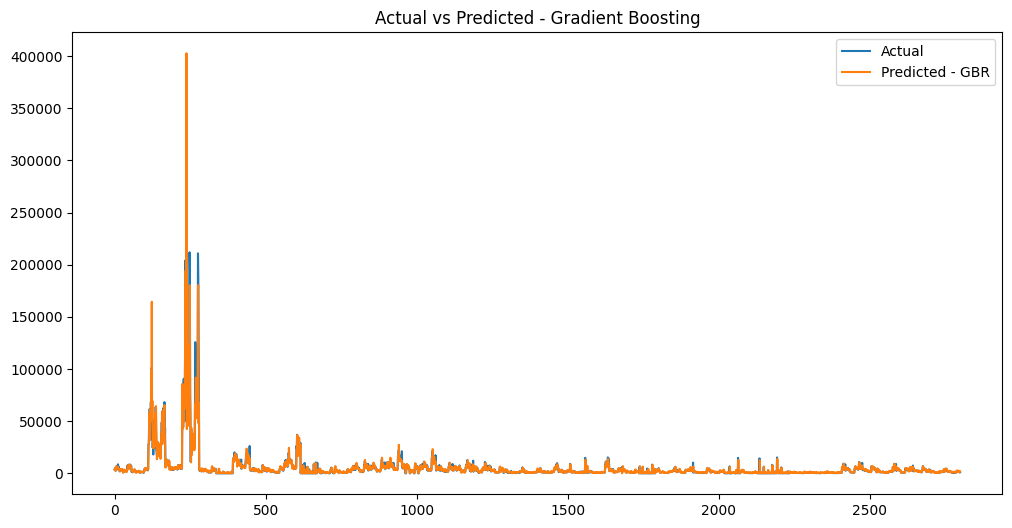

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gbr, label='Predicted - GBR')
plt.legend()
plt.title('Actual vs Predicted - Gradient Boosting')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("RandomForest | R2: {:.4f} | RMSE: {:.4f} | MAE: {:.4f}".format(r2_rf, rmse_rf, mae_rf))


RandomForest | R2: 0.8270 | RMSE: 5850.7159 | MAE: 1822.9348


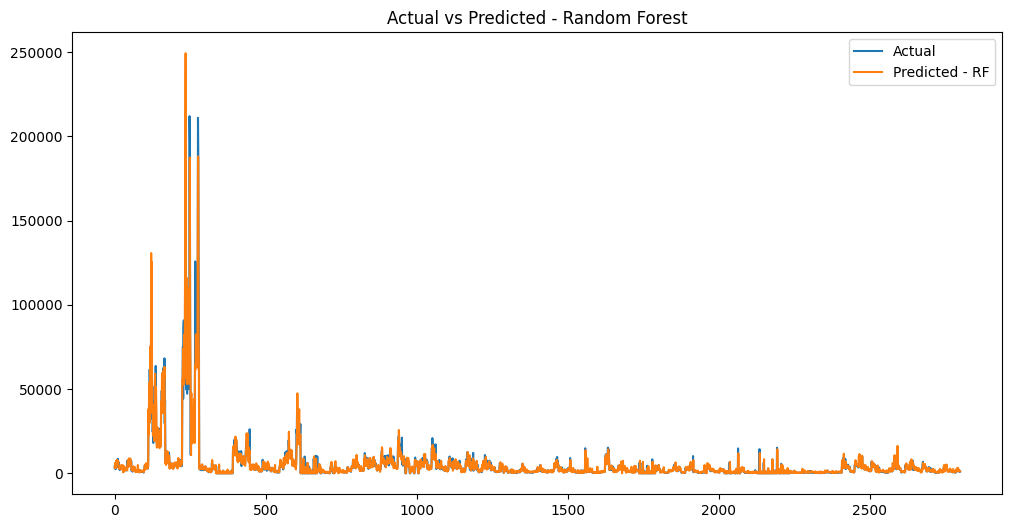

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rf, label='Predicted - RF')
plt.legend()
plt.title('Actual vs Predicted - Random Forest')
plt.show()

In [51]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R2 Score": [r2_lr, r2_rf, r2_gbr],
    "RMSE": [rmse_lr, rmse_rf, rmse_gbr],
    "MAE": [mae_lr, mae_rf, mae_gbr]
})

print(results)

               Model  R2 Score         RMSE          MAE
0  Linear Regression  0.740981  7159.664315  2379.086466
1      Random Forest  0.827033  5850.715879  1822.934794
2  Gradient Boosting  0.619301  8679.963330  1855.008189
